# STEP 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

# STEP 2: Loading the Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
type(cancer)

In [ ]:
cancer.feature_names  #column names

In [ ]:
cancer.data # Independent DATA  or X

In [ ]:
cancer.target #Output or Dependent variable or Y

In [ ]:
cancer.target_names

In [ ]:
cancer.DESCR

#0--- malignant and 1--- Beningn

# STEP 3: Converting dataset to PANDAS DF

In [3]:
cancer_df= pd.DataFrame(data=np.c_[cancer['data'],cancer['target']],\
                        columns=np.append(cancer['feature_names'],['Target']))

In [4]:
cancer_df.head() #the top 5 rows of a dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# STEP 4: VISUALIZING THE DATASET

In [ ]:
sns.scatterplot(cancer_df['mean radius'],cancer_df['mean area'])

In [ ]:
sns.pairplot(cancer_df,hue='Target',vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

In [ ]:
sns.countplot(cancer_df['Target'])

# STEP 5: MODEL CREATION

In [5]:
X=cancer_df.drop('Target',axis=1)
y=cancer_df['Target']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.svm import SVC

In [8]:
svc_model=SVC()

In [9]:
svc_model.fit(X_train,y_train) #fitting the model
y_pred=svc_model.predict(X_test)

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# STEP 6: Evaluating the model

In [10]:
from sklearn.metrics import confusion_matrix,classification_report

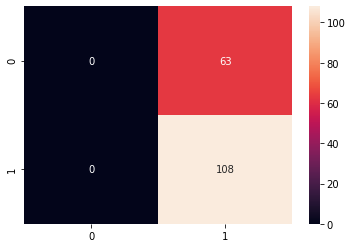

In [12]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0g')

#the model has got 63 type 1 errors that means it wrongly classified 63 Benign patients as malignant.

In [13]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#The unscaled model  with 'rbf' kernel has got 63% accuracy.

In [107]:
svc_model=SVC()
svc_model.fit(X_train,y_train) #fitting the model
y_pred=svc_model.predict(X_test)

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


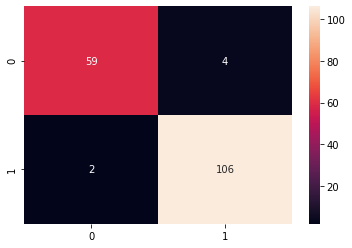

In [18]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0g')

In [19]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        63
         1.0       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#changing the 'rbf' to 'linear' has improved the model(un scaled) accuracy from 63 to 96%
#we have not scaled our model yet.

# STEP : Choosing the important features for the model to improve the accuracy.

In [31]:
#recall the model name we used...
# earlier we have pushed all the variables to the model
# we haven't scaled our model as well.
len(np.transpose(svc_model.coef_))# gives the values of the co-rfficients of all the features only when the kernel is 'linear'

30

In [22]:
svc_model.intercept_ #shows the value of the constant. "c"
#o/p is an list and the value is stored at index at 0th postion.

array([17.2208969])

In [26]:
#taking all the column names of the dataset and storing it in a variable
column_names= cancer_df.columns

In [74]:
#lets create a DF for storing the co-efficients values w.r.t to the features available
infor=pd.DataFrame(data=column_names,columns=['Feature_Name'])

In [77]:
infor=infor[:30] #to remove the "Target" dependent variable from the dataset

In [78]:
c=np.transpose(np.array(svc_model.coef_,dtype='float'))
infor['Coefficients']=c

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
# adding the intercept to the infor dataframe
infor.index=infor.index+1 #increasing the index value by 1

In [82]:
#inserting the "intercept" data in zeroth index
infor.loc[0]=['Intercept',svc_model.intercept_[0]] #inserting the record

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
infor=infor.sort_index()

In [85]:
infor.head()

,Feature_Name,Coefficients
0,Intercept,17.220897
1,mean radius,1.184591
2,mean texture,0.157213
3,mean perimeter,-0.253328
4,mean area,0.006001


# Interpreting the co-efficients


In [86]:
infor['Odds_Ratio']=np.exp(infor.Coefficients)

In [103]:
infor.sort_values('Odds_Ratio',ascending=False)#we want to view the hjighest influential variable

,Feature_Name,Coefficients,Odds_Ratio
0,Intercept,17.220897,3.012593e+07
12,texture error,1.803553,6.071181e+00
1,mean radius,1.184591,3.269350e+00
13,perimeter error,0.392312,1.480400e+00
2,mean texture,0.157213,1.170245e+00
16,compactness error,0.060632,1.062508e+00
20,fractal dimension error,0.011306,1.011370e+00
4,mean area,0.006001,1.006019e+00
23,worst perimeter,0.003028,1.003033e+00
24,worst area,0.000714,1.000714e+00


#texture error and mean radius seem to be the highest influencers in linear kernel before scaling the model.

# STEP 7: Improving Model's Performance

In [95]:
# bringing all the features to one scale
#standerdizing the model
#std.. train data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

In [ ]:
#manual calculations
#std. test set
avg_test=(X_test).mean() # finds mean value of every column.
std_test=(X_test).std()
X_test_std=(X_test-avg_test)/std_test

In [98]:
#fitting the model
#now-our svc_model is linear kernel with std. features
svc_model.fit(X_train_std,y_train)
y_pred_std=svc_model.predict(X_test_std)

# INterpretting the features of std. model

In [100]:
infor_std=pd.DataFrame(data=column_names,columns=['Feature_Name'])
infor_std=infor_std[:30]
c=np.transpose(np.array(svc_model.coef_,dtype='float')) #svc_model is fitted to std features
infor_std['Coefficients']=c
infor_std.index=infor_std.index+1 #increasing the index value by 1
infor_std.loc[0]=['Intercept',svc_model.intercept_[0]] #inserting the record
infor_std=infor_std.sort_index()
infor_std['Odds_Ratio']=np.exp(infor_std.Coefficients)


In [102]:
infor_std.sort_values('Odds_Ratio',ascending=False)#we want to view the hjighest influential variable

,Feature_Name,Coefficients,Odds_Ratio
20,fractal dimension error,0.731971,2.079175
6,mean compactness,0.674601,1.963249
26,worst compactness,0.483873,1.622345
9,mean symmetry,0.329038,1.389631
19,symmetry error,0.324725,1.383651
12,texture error,0.242962,1.275020
0,Intercept,0.169258,1.184426
16,compactness error,0.148554,1.160155
15,smoothness error,0.000122,1.000122
2,mean texture,-0.023732,0.976548


#fractal dimension and mean compatness seem to be the highest infuencers after standered scaling the model.

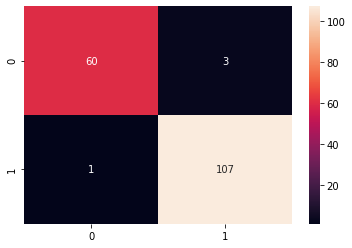

In [105]:
cm_std=confusion_matrix(y_test,y_pred_std)
sns.heatmap(cm_std,annot=True,fmt='0g')

In [106]:
print(classification_report(y_test,y_pred_std))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97        63
         1.0       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



#Standerdized model has wrongly classifed 1 Malignant Tumour as Benign and 3 Begingn tumours as Malignant.
#scaled model with linear kernel has accuracy of 98%.

In [108]:
#Changing back the kernel from 'linear' to 'rbf'
svc_model.fit(X_train_std,y_train)
y_pred_std=svc_model.predict(X_test_std)

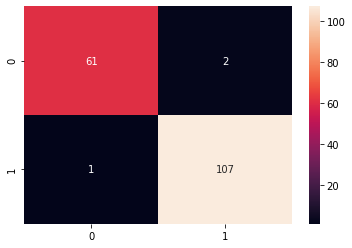

In [109]:
cm_std=confusion_matrix(y_test,y_pred_std)
sns.heatmap(cm_std,annot=True,fmt='0g')

In [110]:
print(classification_report(y_test,y_pred_std))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        63
         1.0       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#std. model with 'rbf' kernel has got us 98% accuracy.
#but the model has  reduced the type 1 error.
#now it has mis classified only 2 benign cases as malignant.

# STEP 8: Considering Model's C & Gamma parameters.

In [112]:
#We use GridSearchCV to find the best values of C & Gamma for the SVC model.
parameters={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['linear','poly','rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),parameters,refit=True,verbose=4)

In [113]:
grid.fit(X_train_std,y_train)

C:\Users\BHAVANABhavana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.970, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.992, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.970, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.955, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.917, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.955, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.985, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.947, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.970, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.985, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.955, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.624, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.955, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.955, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.917, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.955, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.985, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.924, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] ..... C=100, gamma=0.001, kernel=poly, score=0.647, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [114]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

# Let's use the best parameters suggested by the system

In [165]:
svc_model_best=SVC(C=.1,gamma=1,kernel='linear')

In [166]:
svc_model_best.fit(X_train_std,y_train)
y_pred_best_std=svc_model_best.predict(X_test_std)

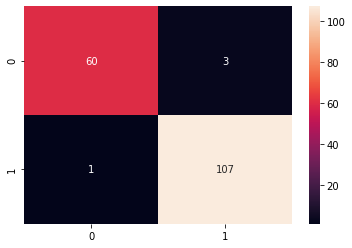

In [167]:
cm_best_std=confusion_matrix(y_test,y_pred_best_std)
sns.heatmap(cm_best_std,annot=True,fmt='0g')

#the best parameters for linear kernel has no change type 1 error is 3 and type 2 is 1

In [118]:
print(classification_report(y_test,y_pred_best_std))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97        63
         1.0       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [143]:
#using rbf kernel.
svc_model_best=SVC(C=2,gamma=.01,kernel='rbf')
svc_model_best.fit(X_train_std,y_train)
y_pred_best_std=svc_model_best.predict(X_test_std)

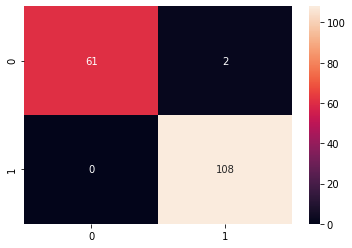

In [144]:
cm_best_std=confusion_matrix(y_test,y_pred_best_std)
sns.heatmap(cm_best_std,annot=True,fmt='0g')

In [145]:
print(classification_report(y_test,y_pred_best_std))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



#changing the kernel from 'linear' to 'rbf' seemed to be disastorous
#but using the features c as 2 and gamma as 0.01 has made rbf overcome type 2 error.
#Std. model 'rbf' kernel c=2 , gamma= 0.01 has got 99% accuracy

In [154]:
#changing kernel as 'poly' and C as 1
svc_model_best=SVC(C=1,gamma=.1,kernel='poly')
svc_model_best.fit(X_train_std,y_train)
y_pred_best_std=svc_model_best.predict(X_test_std)

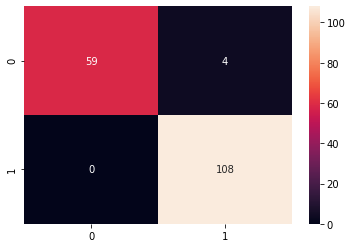

In [155]:
cm_best_std=confusion_matrix(y_test,y_pred_best_std)
sns.heatmap(cm_best_std,annot=True,fmt='0g')

In [156]:
print(classification_report(y_test,y_pred_best_std))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        63
         1.0       0.96      1.00      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



#POlynomial kernel seems to be good apart from rbf kernel as it has completely omitted the Type 2 error .
#type 1 error classiying the 4 benign tumours as malignant.
#std. model with "poly" kernel , c=1, gamma=0.1 has got 98% accuracy.

# STEP 9: VISUALISING THE SVC MODEL for only test set ON ONLY 2 PARAMETERS suggested as per the odds ratio


#LInEAR KERNEL WITH C=1, gamma=0.1 has given us accuracy of 84%

In [160]:
X_train_new=np.append((X_train_std[:,19]).reshape(398,1),\
                    values=(X_train_std[:,5]).reshape(398,1),\
                    axis=1)
#19th column is fractal dimension and 5th column is mean compactness

In [168]:
#plotting the best parameters for linear kernel
svc_model_best_1=SVC(C=1, gamma=.1,kernel='linear')
svc_model_best_1.fit(X_train_new,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [169]:
X_test_new=np.append((X_test_std[:,19]).reshape(171,1),\
                    values=(X_test_std[:,5]).reshape(171,1),\
                    axis=1)

In [170]:
y_pred_new=svc_model_best_1.predict(X_test_new)

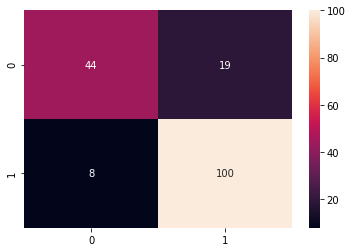

In [171]:
cm_new= confusion_matrix(y_test,y_pred_new)
sns.heatmap(cm_new,annot=True,fmt='0g')

In [179]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77        63
         1.0       0.84      0.93      0.88       108

    accuracy                           0.84       171
   macro avg       0.84      0.81      0.82       171
weighted avg       0.84      0.84      0.84       171



In [172]:
#plotting SVC
def mesh_grid(X,Y,h=0.01):
    '''
    a function that does mesh grid
    X axis --- one feature of X
    Y axis --- another feature of X
    '''
    x_min,x_max=X.min()-1,X.max()+1
    y_min,y_max=Y.min()-1,Y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))
    return xx,yy

In [176]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X_test_new[:,0:2],y_test
X1,X2=mesh_grid(X_set[:,0],X_set[:,1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


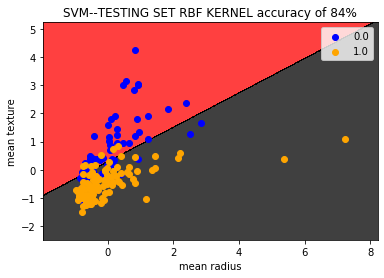

In [180]:
plt.contourf(X1,X2,svc_model_best_1.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','black')))
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                c=ListedColormap(('blue','orange'))(i),label=j)
plt.title('SVM--TESTING SET RBF KERNEL accuracy of 84%')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()

#PLOTTING RBF KERNEL WITH C=2, gamma=0.01 for test set has given accuracy of 84%

In [181]:
svc_model_best_2=SVC(C=2,gamma=.01,kernel='rbf')

In [182]:
svc_model_best_2.fit(X_train_new,y_train)
y_pred_new_2=svc_model_best_2.predict(X_test_new)

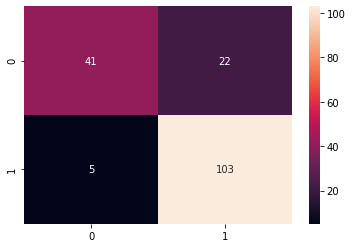

In [183]:
cm_new_2= confusion_matrix(y_test,y_pred_new_2)
sns.heatmap(cm_new_2,annot=True,fmt='0g')

In [184]:
print(classification_report(y_test,y_pred_new_2))

              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75        63
         1.0       0.82      0.95      0.88       108

    accuracy                           0.84       171
   macro avg       0.86      0.80      0.82       171
weighted avg       0.85      0.84      0.84       171



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


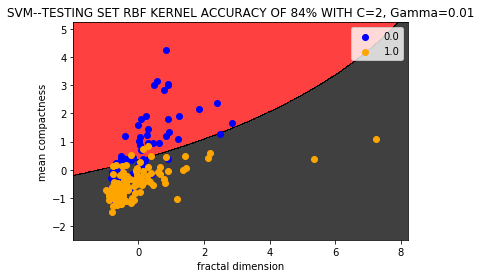

In [186]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X_test_new[:,0:2],y_test
X1,X2=mesh_grid(X_set[:,0],X_set[:,1])

plt.contourf(X1,X2,svc_model_best_2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','black')))
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                c=ListedColormap(('blue','orange'))(i),label=j)
plt.title('SVM--TESTING SET RBF KERNEL ACCURACY OF 84% WITH C=2, Gamma=0.01')
plt.xlabel('fractal dimension')
plt.ylabel('mean compactness')
plt.legend()

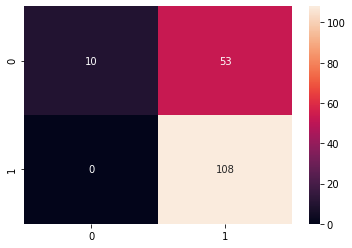

In [207]:
# POLY KERNEL WITH C=1 and gamma=0.1
svc_model_best_3=SVC(C=1,gamma=.1,kernel='poly',degree=3)
svc_model_best_3.fit(X_train_new,y_train)
y_pred_new_3=svc_model_best_3.predict(X_test_new)
cm_new_3= confusion_matrix(y_test,y_pred_new_3)
sns.heatmap(cm_new_3,annot=True,fmt='0g')

In [191]:
print(classification_report(y_test,y_pred_new_3))

              precision    recall  f1-score   support

         0.0       1.00      0.16      0.27        63
         1.0       0.67      1.00      0.80       108

    accuracy                           0.69       171
   macro avg       0.84      0.58      0.54       171
weighted avg       0.79      0.69      0.61       171



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


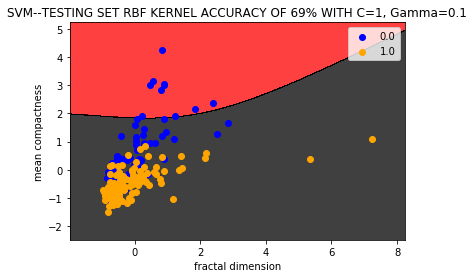

In [208]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X_test_new[:,0:2],y_test
X1,X2=mesh_grid(X_set[:,0],X_set[:,1])

plt.contourf(X1,X2,svc_model_best_3.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','black')))
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                c=ListedColormap(('blue','orange'))(i),label=j)
plt.title('SVM--TESTING SET RBF KERNEL ACCURACY OF 69% WITH C=1, Gamma=0.1')
plt.xlabel('fractal dimension')
plt.ylabel('mean compactness')
plt.legend()

In [210]:
# Mean compactness and Fractal dimensions areb't the top influencers for the model to train on.
# But'mean radius' and 'mean 'texture' would give the accuracy of 96-98% with best features
#please try.
